In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the data with the first column as the index
raw_price_data = pd.read_csv("C:/Users/savar/Downloads/SP500_close_price_no_missing.csv", index_col=0)
ticker_info = pd.read_csv("C:/Users/savar/Downloads/SP500_ticker.csv", encoding="ISO-8859-1")

# Derive log returns using the specified formula
log_returns = np.log(raw_price_data.shift(-1) / raw_price_data).dropna()

# Standardize the log returns
scaler = StandardScaler()
standardized_returns = scaler.fit_transform(log_returns)

# Fit PCA model
pca = PCA()
pca.fit(standardized_returns)
print(log_returns)


                 MMM       ACE       ABT       ANF      ADBE       AMD  \
date                                                                     
2011-01-03 -0.001384 -0.000643  0.009366 -0.031688  0.007006  0.034806   
2011-01-04  0.000000 -0.003382  0.000000 -0.015596  0.022282  0.015837   
2011-01-05 -0.006134 -0.004365 -0.002074 -0.033434  0.001551 -0.025001   
2011-01-06  0.001044 -0.007481  0.004143  0.000747 -0.007153  0.015982   
2011-01-07  0.010613 -0.013145 -0.008930  0.012429  0.028310  0.039961   
...              ...       ...       ...       ...       ...       ...   
2014-12-24  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2014-12-25 -0.004201  0.001550  0.003277  0.005686 -0.000937  0.000000   
2014-12-26  0.002703  0.002235 -0.005467  0.016518 -0.007258  0.003766   
2014-12-29 -0.005232 -0.001719  0.001972  0.002437 -0.013992 -0.011342   
2014-12-30 -0.009208 -0.012027 -0.014773 -0.004181 -0.005487  0.015095   

                 AES       AET       

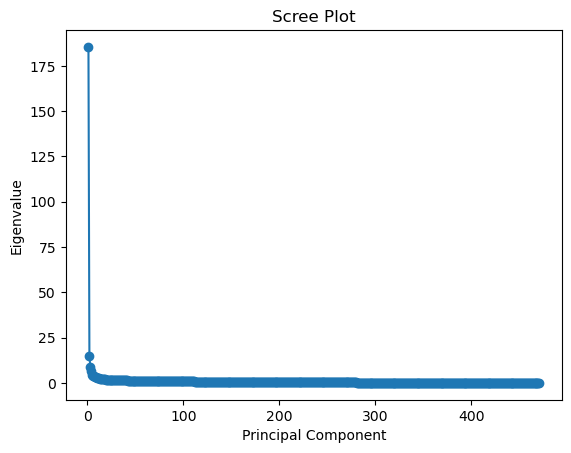

In [2]:
# Scree plot
eigenvalues = pca.explained_variance_
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

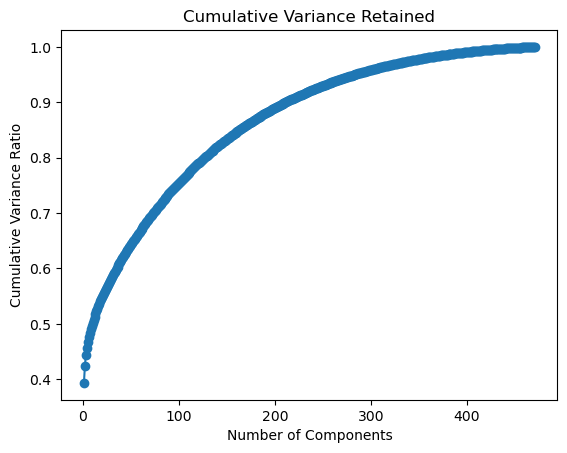

In [3]:
# Cumulative variance plot
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title('Cumulative Variance Retained')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Ratio')
plt.show()


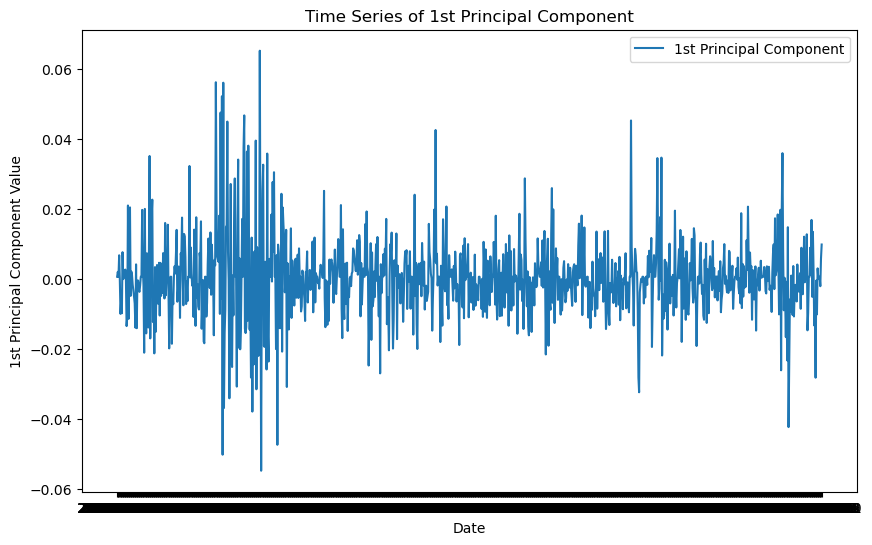

The date with the lowest value for the 1st principal component is: 2011-10-27


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'Log_Return' is the column containing log returns
log_returns = raw_data['Log_Return'].values.reshape(-1, 1)

# Handle NaN values by filling them with a specific value or method
log_returns_cleaned = np.nan_to_num(log_returns)

# Fit a PCA model on cleaned data
pca = PCA()
principal_components = pca.fit_transform(log_returns_cleaned)

# Extract the 1st principal component
first_principal_component = principal_components[:, 0]

# Create a time series DataFrame
time_series_df = pd.DataFrame({
    'Date': raw_data['date'],  # Assuming you have a 'date' column in your raw_data
    '1st_Principal_Component': first_principal_component
})

# Plot the time series of the 1st principal component
plt.figure(figsize=(10, 6))
plt.plot(time_series_df['Date'], time_series_df['1st_Principal_Component'], label='1st Principal Component')
plt.title('Time Series of 1st Principal Component')
plt.xlabel('Date')
plt.ylabel('1st Principal Component Value')
plt.legend()
plt.show()

# Identify the date with the lowest value for the 1st principal component
min_date_index = np.argmin(first_principal_component)
min_date = raw_data['date'].iloc[min_date_index]

print(f"The date with the lowest value for the 1st principal component is: {min_date}")


In [4]:
# Extract the weights for the 1st and 2nd principal components
weights_1st_component = pca.components_[0]
weights_2nd_component = pca.components_[1]

# Print the weights
print("Weights for the 1st Principal Component:")
print(weights_1st_component)

print("\nWeights for the 2nd Principal Component:")
print(weights_2nd_component)

Weights for the 1st Principal Component:
[-0.06148286 -0.05612293 -0.01338367 -0.03142776 -0.04873121 -0.03739019
 -0.05189389 -0.04368021 -0.05903906 -0.05146821 -0.05518395 -0.05411716
 -0.04362366 -0.0379498  -0.05502761 -0.05357572 -0.04042444 -0.05536893
 -0.04513837 -0.03938982 -0.03666691 -0.04441632 -0.04092533 -0.05768976
 -0.05357866 -0.04201156 -0.06338442 -0.04514652 -0.03825544 -0.03280334
 -0.0522285  -0.05389427 -0.05285698 -0.05189078 -0.05046586 -0.02746048
 -0.00855835 -0.05017396 -0.05091829 -0.05338743 -0.04309722 -0.04969014
 -0.0555124  -0.04393453 -0.03207285 -0.04537758 -0.05116935 -0.03199813
 -0.04889843 -0.0251804  -0.05309729 -0.05897595 -0.04608874 -0.04877988
 -0.05732623 -0.04962918 -0.03849037 -0.05048002 -0.06121387 -0.02521246
 -0.02667146 -0.0364229  -0.06182838 -0.04243292 -0.0026297  -0.05293305
 -0.05372974 -0.04229311 -0.03708482 -0.04393482 -0.03557961 -0.04287546
 -0.05175368 -0.03206475 -0.02687835 -0.05160657 -0.03594994 -0.0544989
 -0.0475701

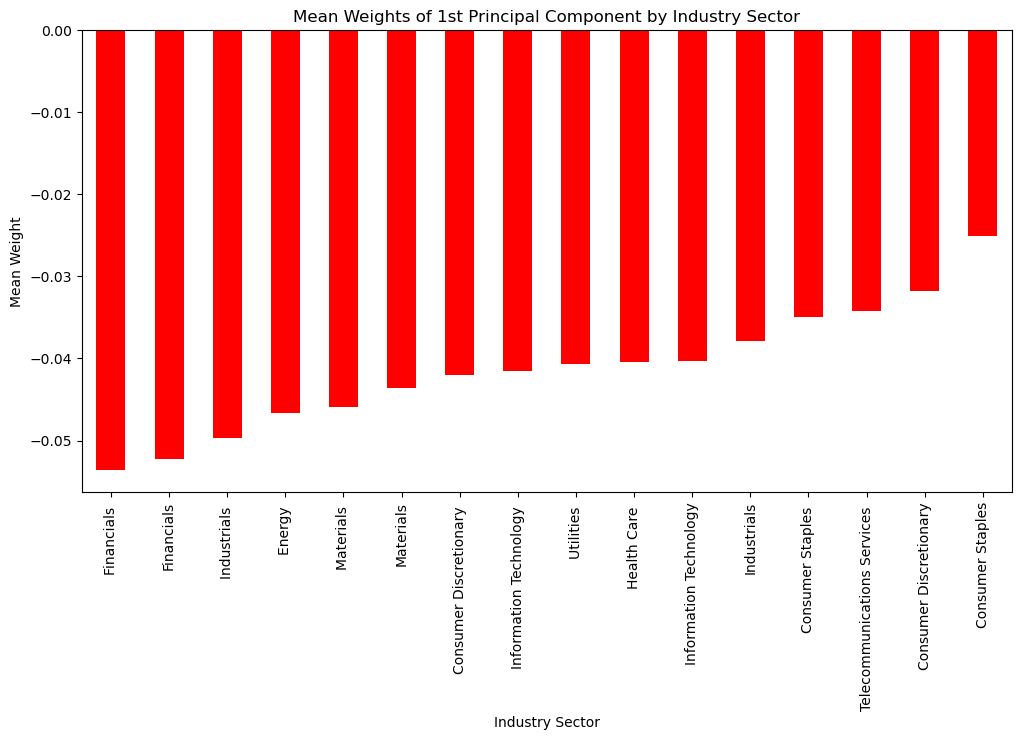

In [5]:
weights_1st_component = pca.components_[0]
# Merge ticker information with weights
weights_df = pd.DataFrame({"Ticker": raw_price_data.columns, "Weight": weights_1st_component})
merged_df = pd.merge(ticker_info, weights_df, left_on="ticker", right_on="Ticker")

# Group by industry sector and calculate mean weight
mean_weights_by_sector = merged_df.groupby("sector")["Weight"].mean().sort_values()

# Create a bar plot
plt.figure(figsize=(12, 6))
mean_weights_by_sector.plot(kind="bar", color=np.where(mean_weights_by_sector >= 0, 'b', 'r'))
plt.title('Mean Weights of 1st Principal Component by Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight')
plt.show()


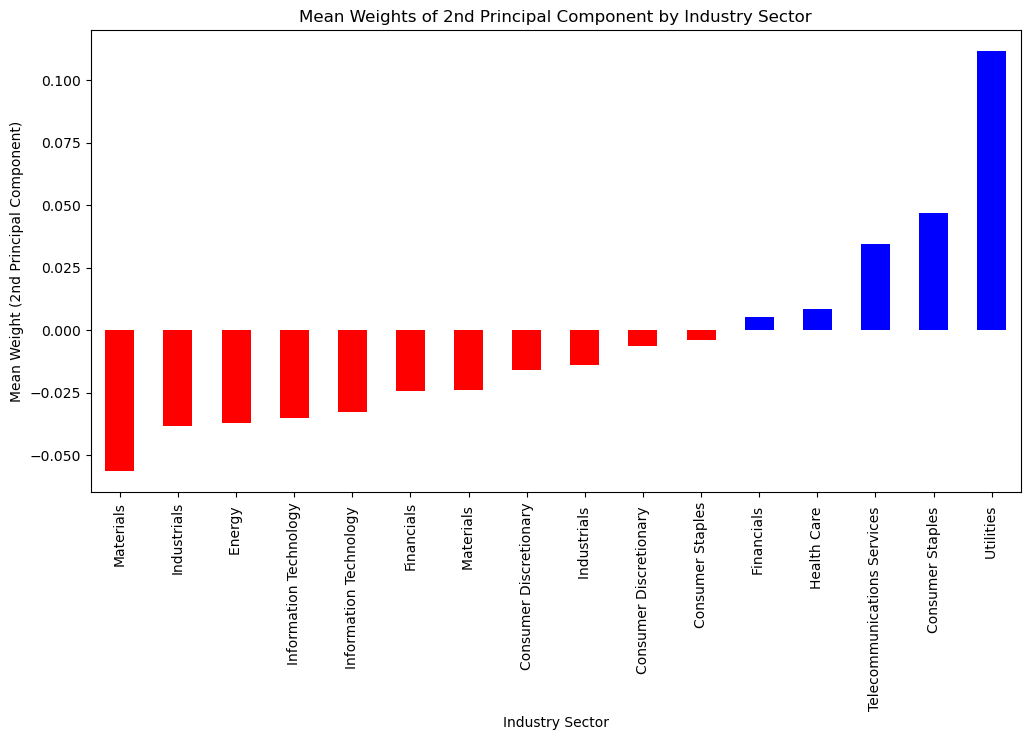

In [6]:
# Extract the weights for the 2nd principal component
weights_2nd_component = pca.components_[1]

# Merge ticker information with weights for the 2nd principal component
weights_df_2nd = pd.DataFrame({"Ticker": raw_price_data.columns, "Weight_2nd": weights_2nd_component})
merged_df_2nd = pd.merge(ticker_info, weights_df_2nd, left_on="ticker", right_on="Ticker")

# Group by industry sector and calculate mean weight for the 2nd principal component
mean_weights_by_sector_2nd = merged_df_2nd.groupby("sector")["Weight_2nd"].mean().sort_values()

# Create a bar plot for the 2nd principal component
plt.figure(figsize=(12, 6))
mean_weights_by_sector_2nd.plot(kind="bar", color=np.where(mean_weights_by_sector_2nd >= 0, 'b', 'r'))
plt.title('Mean Weights of 2nd Principal Component by Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight (2nd Principal Component)')
plt.show()


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv("C:/Users/savar/Downloads/BMI.csv")

# Define features (X) and target variable (y)
X = data.drop('fatpctg', axis=1)
y = data['fatpctg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate the model on a given set of features
def evaluate_model(features):
    model = LinearRegression()
    model.fit(X_train[features], y_train)
    y_pred = model.predict(X_test[features])
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Forward stepwise regression
def forward_stepwise_regression():
    selected_features = []
    remaining_features = list(X.columns)

    while remaining_features:
        mse_values = []
        for feature in remaining_features:
            current_features = selected_features + [feature]
            mse = evaluate_model(current_features)
            mse_values.append((mse, feature))
        
        # Select the feature with the lowest MSE
        best_feature = min(mse_values, key=lambda x: x[0])[1]
        
        # Add the best feature to the selected features
        selected_features.append(best_feature)
        
        # Remove the best feature from the remaining features
        remaining_features.remove(best_feature)

    return selected_features

# Backward stepwise regression
def backward_stepwise_regression():
    selected_features = list(X.columns)

    while len(selected_features) > 1:
        mse_values = []
        for feature in selected_features:
            current_features = selected_features.copy()
            current_features.remove(feature)
            mse = evaluate_model(current_features)
            mse_values.append((mse, feature))
        
        # Select the feature to remove with the lowest MSE
        worst_feature = min(mse_values, key=lambda x: x[0])[1]
        
        # Remove the worst feature from the selected features
        selected_features.remove(worst_feature)

    return selected_features

# Perform forward stepwise regression
forward_selected_features = forward_stepwise_regression()
print("Forward Stepwise Regression Selected Features:", forward_selected_features)

# Perform backward stepwise regression
backward_selected_features = backward_stepwise_regression()
print("Backward Stepwise Regression Selected Features:", backward_selected_features)


Forward Stepwise Regression Selected Features: ['Abdomen', 'Weight', 'Forearm', 'Neck', 'Hip', 'Thigh', 'Age', 'Knee', 'Ankle', 'Chest', 'Height', 'Biceps', 'Wrist']
Backward Stepwise Regression Selected Features: ['Abdomen']


In [33]:
import pandas as pd

# Load the data
data = pd.read_csv("C:/Users/savar/Downloads/BMI.csv")

# Calculate the correlation between features and the target variable
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['fatpctg'].abs().sort_values(ascending=False)

# Display the ranking of features based on correlation with the target
print("Feature Ranking Based on Correlation with Target:")
print(correlation_with_target)


Feature Ranking Based on Correlation with Target:
fatpctg    1.000000
Abdomen    0.813432
Chest      0.702620
Hip        0.625201
Weight     0.612925
Thigh      0.559608
Knee       0.508665
Biceps     0.493271
Neck       0.490592
Forearm    0.361387
Wrist      0.346575
Age        0.291458
Ankle      0.265970
Height     0.133211
Name: fatpctg, dtype: float64


In [8]:
# c) Embedded method:
# (1) Lasso regression
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha parameter
lasso_model.fit(X_train, y_train)
lasso_coefficients = pd.Series(lasso_model.coef_, index=X.columns).sort_values(ascending=False)
print("Lasso Coefficients:")
print(lasso_coefficients)

Lasso Coefficients:
Abdomen    0.965080
Biceps     0.278670
Forearm    0.170439
Thigh      0.145362
Age        0.056399
Ankle      0.053338
Knee       0.000000
Chest     -0.059426
Weight    -0.064379
Height    -0.064458
Hip       -0.093356
Neck      -0.393204
Wrist     -1.783823
dtype: float64


In [10]:
from sklearn.ensemble import RandomForestRegressor

# Load the data
data = pd.read_csv("C:/Users/savar/Downloads/BMI.csv")

# Separate features and target variable
X = data.drop('fatpctg', axis=1)
y = data['fatpctg']

# Fit Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# Extract feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display feature importances
print("Feature Importances from Random Forest:")
print(feature_importances)


Feature Importances from Random Forest:
Abdomen    0.731153
Height     0.029401
Weight     0.029395
Wrist      0.026041
Knee       0.023688
Neck       0.023267
Hip        0.022485
Age        0.022080
Thigh      0.020623
Chest      0.020444
Ankle      0.019897
Biceps     0.017453
Forearm    0.014072
dtype: float64


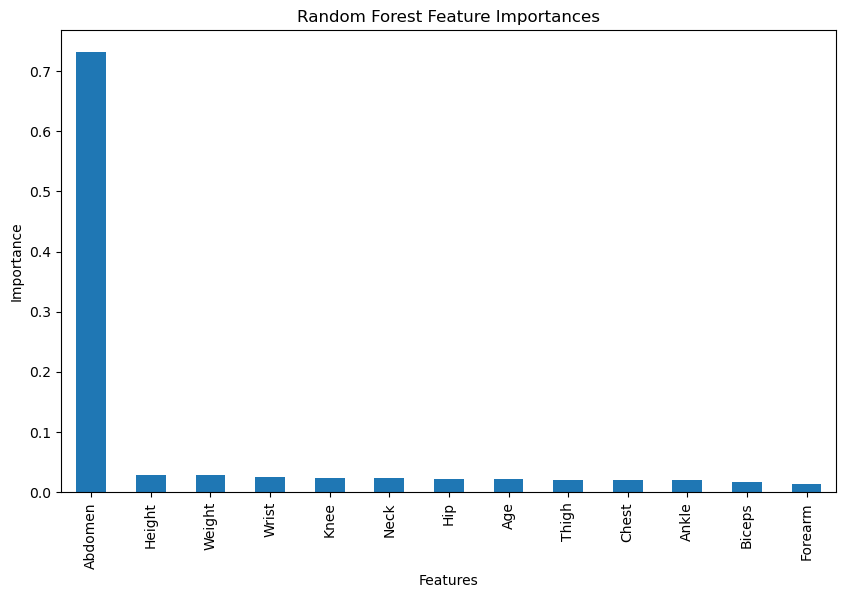

In [11]:
# Visualize feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title("Random Forest Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()